In [1]:
import os



project_dir = os.path.abspath('..')
data_dir = os.path.join(project_dir, 'data')
notebook_dir = os.path.join(project_dir, 'notebooks')

print("Current data directory is: " + data_dir)

Current data directory is: /home/fishium/course/bio2502/CenProteo/data


In [2]:
from cenproteo import classical_algorithms



ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
class_test = classical_algorithms(ppi_file)
class_test_sorted_score = class_test.cCC() # Change different method by using different function  -- class_test.NC(N)
essencial_count = class_test.first_n_comparison(5,class_test_sorted_score, essential_protein) # compare the essential protein between the result and the ground truth

There're 3 essential proteins in the top 5 predicted by algorism.


In [3]:
from cenproteo import JDC



ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
JDC_test =  JDC(ppi_file,gene_expression)
essencial_count = JDC_test.first_n_comparison(200, essential_protein)

There're 115 essential proteins in the top 200 predicted by algorism.


In [4]:
from cenproteo import TEO



ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
TEO_test = TEO(ppi_file, gene_expression)
TEO_test.first_n_comparison(100,"BP", essential_protein) #You can choose method by changing parameters with "BP" "MF" "CC"

There're 60 essential proteins in the top 100 predicted by TEO_BP algorism.


60

In [5]:
from cenproteo import TGSO



ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
subcellular_localization_file = os.path.join(data_dir, "yeast_compartment_knowledge_full.csv")
i_score = os.path.join(data_dir, "I_score.csv")
tgso_test = TGSO(ppi_file, gene_expression, subcellular_localization_file, i_score)
tgso_test.first_n_comparison(100, essential_protein)

There're 69 essential proteins in the top 100 predicted by TGSO algorism. 
The iteration has been repeated for 2 times.


69

## Plot

In [6]:
from cenproteo import classical_algorithms,JDC,TEO,TGSO



ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
subcellular_localization_file = os.path.join(data_dir, "yeast_compartment_knowledge_full.csv")
i_score = os.path.join(data_dir, "I_score.csv")
classical_method_list = ["DC", "BC", "NC", "cCC", "EC", "IC", "SC"]
teo_method_list = ["BP","MF","tCC"]
classical_method = classical_algorithms(ppi_file=ppi_file)
jdc_method = JDC(ppi_file=ppi_file,gene_expression_file=gene_expression)
teo_method = TEO(ppi_file=ppi_file,gene_expression_file=gene_expression)
tgso_test = TGSO(ppi_file, gene_expression, subcellular_localization_file, i_score)

In [7]:
classical_method_result_dict = {}
for method_name in classical_method_list:
    # 使用 getattr() 函数来动态调用类中的方法
    result = getattr(classical_method, method_name)
    classical_method_result_dict[method_name] = result()

In [8]:
n_list = [100, 200, 400]
classical_algorithms_count = {key: [] for key in classical_method_list}
teo_count = {key: [] for key in teo_method_list}
jdcs_count = []
tgsos_count = []
for n in n_list:
    for method_name in classical_method_list:
        classical_algorithms_count[method_name].append(
            classical_method.first_n_comparison(
                n, classical_method_result_dict[method_name], essential_protein
            )
        )
    jdcs_count.append(jdc_method.first_n_comparison(n, essential_protein))
    for method_name in teo_method_list:
        teo_count[method_name].append(
            teo_method.first_n_comparison(n, method_name, essential_protein)
        )
    tgsos_count.append(tgso_test.first_n_comparison(n, essential_protein))
all_counts = {}
for method, counts in zip(
    [*classical_algorithms_count, "JDC", *teo_count, "TGSO"],
    [
        *classical_algorithms_count.values(),
        jdcs_count,
        *teo_count.values(),
        tgsos_count,
    ],
):
    all_counts[method] = counts

There're 44 essential proteins in the top 100 predicted by algorism.
There're 42 essential proteins in the top 100 predicted by algorism.
There're 52 essential proteins in the top 100 predicted by algorism.
There're 40 essential proteins in the top 100 predicted by algorism.
There're 37 essential proteins in the top 100 predicted by algorism.
There're 42 essential proteins in the top 100 predicted by algorism.
There're 37 essential proteins in the top 100 predicted by algorism.
There're 60 essential proteins in the top 100 predicted by algorism.
There're 60 essential proteins in the top 100 predicted by TEO_BP algorism.
There're 59 essential proteins in the top 100 predicted by TEO_MF algorism.
There're 58 essential proteins in the top 100 predicted by TEO_tCC algorism.
There're 69 essential proteins in the top 100 predicted by TGSO algorism. 
The iteration has been repeated for 2 times.
There're 79 essential proteins in the top 200 predicted by algorism.
There're 71 essential proteins

#### 绘制折线图

In [9]:
# %pip install matplotlib

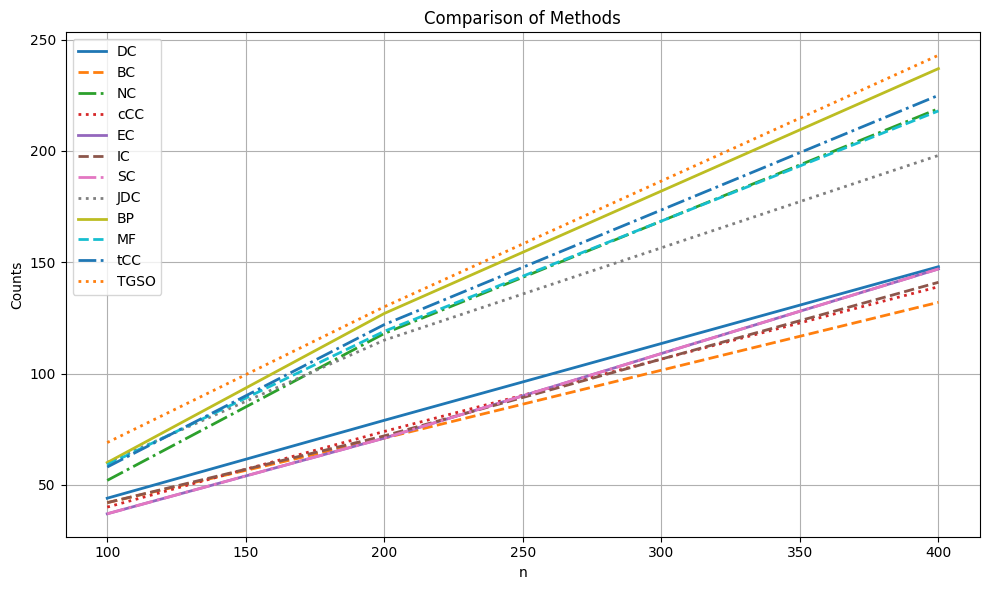

In [10]:
import matplotlib.pyplot as plt
import numpy as np


color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
line_styles = ["-", "--", "-.", ":"]

# 创建更大的图形
fig, ax = plt.subplots(figsize=(10, 6))

# 遍历每个方法，生成美化的折线图
for i, method in enumerate(all_counts):
    counts = all_counts[method]
    color = color_cycle[i % len(color_cycle)]
    line_style = line_styles[i % len(line_styles)]
    ax.plot(
        n_list, counts, label=method, color=color, linestyle=line_style, linewidth=2
    )

ax.set_xlabel("n")
ax.set_ylabel("Counts")
ax.set_title("Comparison of Methods")
ax.legend()
ax.grid(True)  # 添加网格线

plt.tight_layout()  # 调整布局，防止标签被裁剪
export_fig = os.path.join(notebook_dir, "comparison.svg")
plt.savefig(export_fig, format="svg")

#### 绘制柱状图

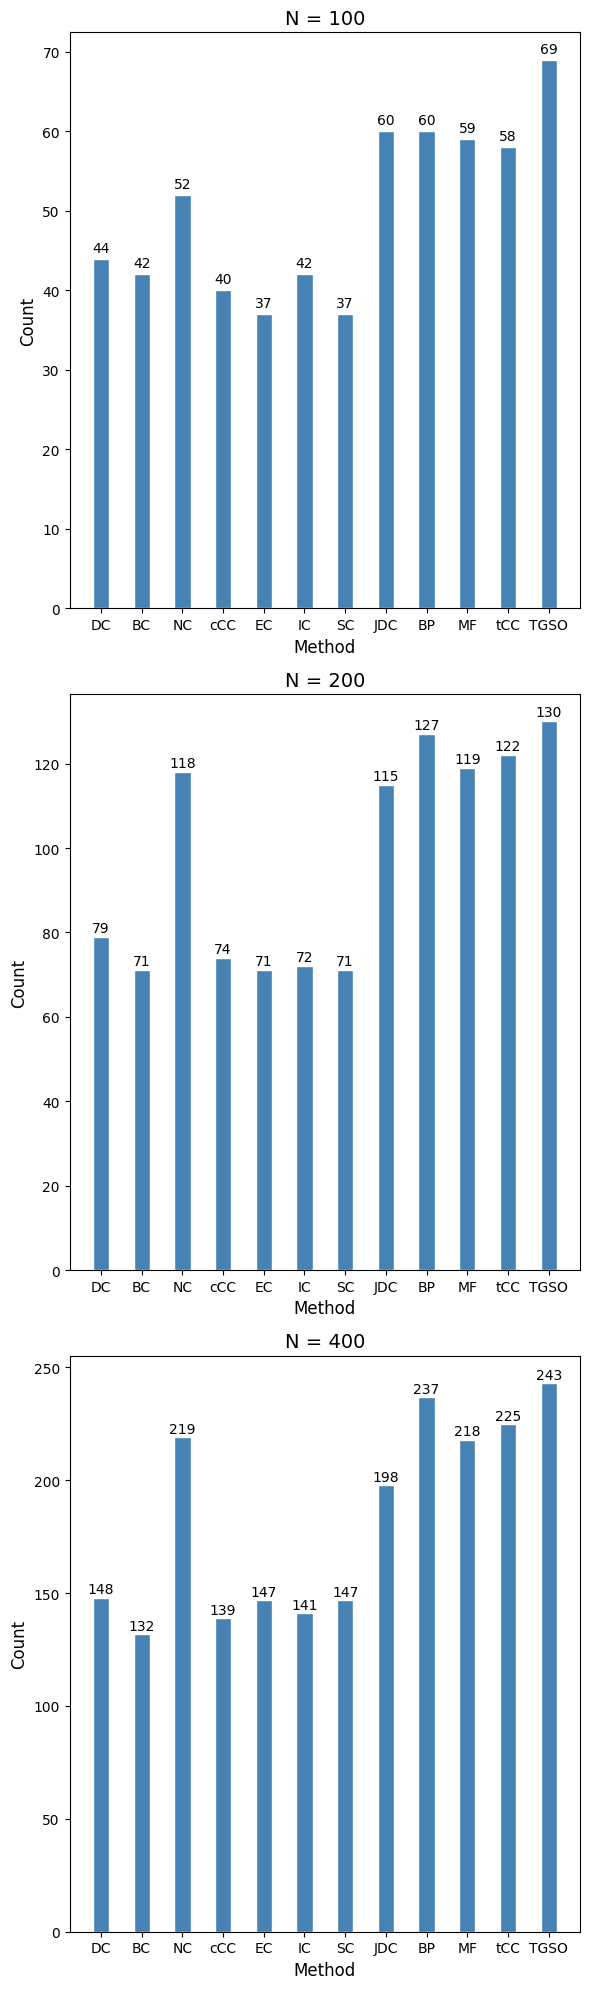

In [11]:
# 绘制柱状图
fig, axes = plt.subplots(3, figsize=(6, 20))

# 遍历每个子图
for i, ax in enumerate(axes):
    method_values = [all_counts[method][i] for method in all_counts.keys()]
    methods = list(all_counts.keys())
    ax.bar(
        methods,
        method_values,
        color="steelblue",
        linewidth=1,
        edgecolor="white",
        width=0.4,
    )
    ax.set_xlabel("Method", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"N = {n_list[i]}", fontsize=14)

    # 在每个柱子上方添加数据标签
    for j, v in enumerate(method_values):
        ax.text(j, v + 0.5, str(v), ha="center", va="bottom")


plt.tight_layout()
export_fig = os.path.join(notebook_dir, "different_n_counts.svg")
plt.savefig(export_fig, format="svg")